In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../Desktop/data_preprocessing.csv', encoding = 'euc-kr')
date = data['일자']
data['KAU'] = data['KAU'].str.replace(',', '').astype(float)
data['전력공급'] = data['전력공급'].str.replace(',', '').astype(float)
data['USD'] = data['USD'].str.replace(',', '').astype(float)

data.rename({'전력공급' : 'energy', '평균기온(℃)' : 'Tmp', '습도(%)':'Humidity','열지수' : 'Heat_idx', '계절':'Season'}, axis = 1, inplace = True)
data.drop('일자', axis = 1, inplace = True)
data.head()


,KAU,energy,Tmp,USD,Humidity,Heat_idx,Season
0,35100.0,105343.0,-3.9,1189.36,49.6,-3.57,Winter
1,35050.0,103867.0,0.4,1184.70,73.5,0.41,Winter
2,35000.0,101789.0,-4.1,1188.09,74.2,-4.35,Winter
3,34900.0,103554.0,-7.6,1185.61,57.9,-8.03,Winter
4,35000.0,101856.0,-0.3,1185.99,66.7,0.53,Winter


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KAU       496 non-null    float64
 1   energy    496 non-null    float64
 2   Tmp       496 non-null    float64
 3   USD       496 non-null    float64
 4   Humidity  496 non-null    float64
 5   Heat_idx  496 non-null    float64
 6   Season    496 non-null    object 
dtypes: float64(6), object(1)
memory usage: 27.2+ KB


<AxesSubplot:>

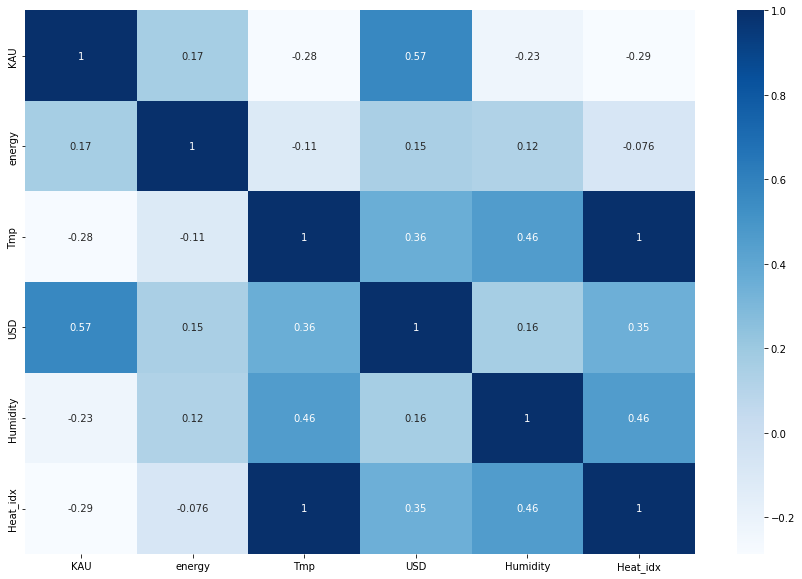

In [155]:
cols = ['KAU', 'energy', 'Tmp', 'USD', 'Humidity', 'Heat_idx']
plt.figure(figsize = (15, 10))
sns.heatmap(data[cols].corr(), annot = True, cmap = 'Blues')


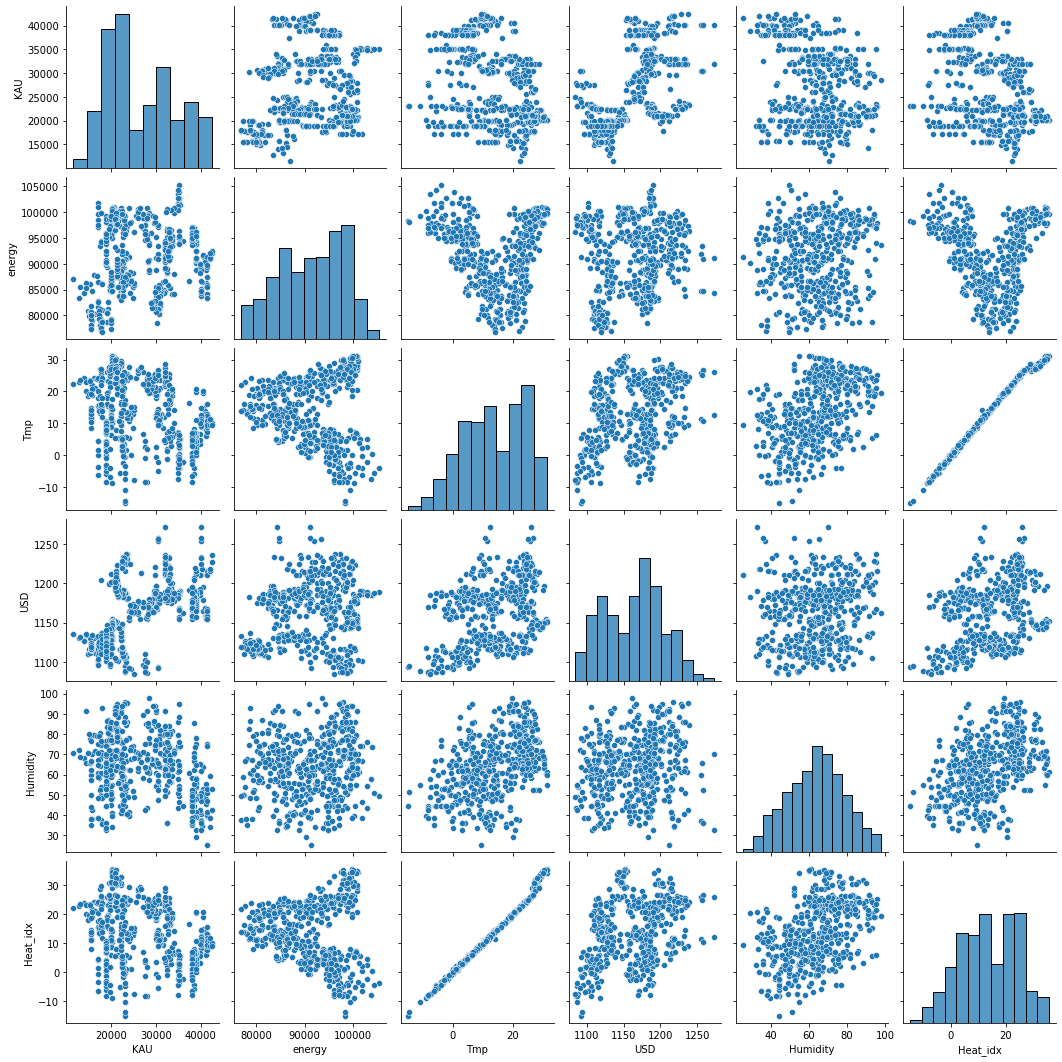

In [156]:
sns.pairplot(data[cols])

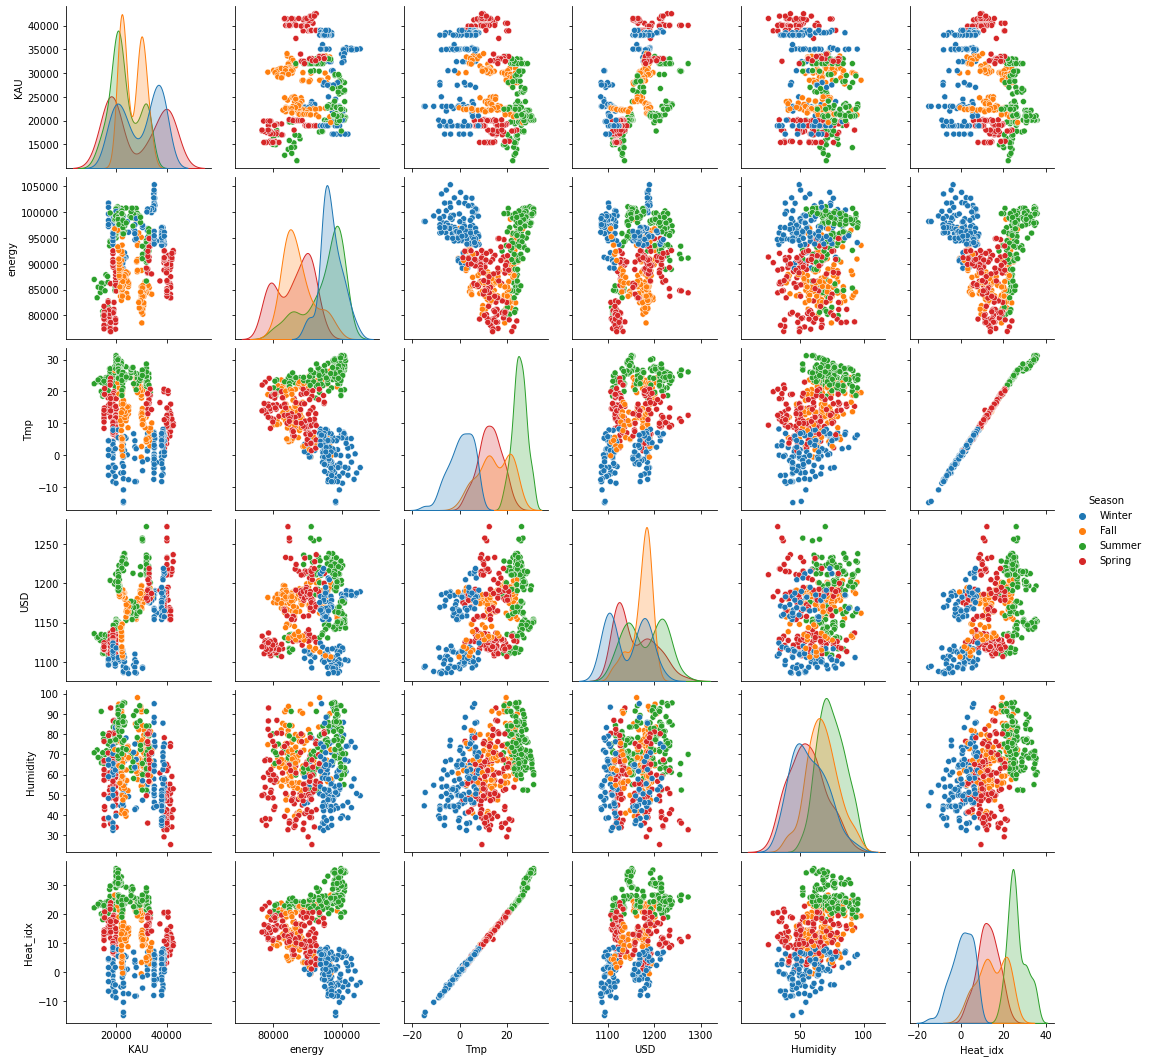

In [157]:
sns.pairplot(data, hue = 'Season')

In [158]:
Winter_df = data.loc[data['Season'] == 'Winter']
Fall_df = data.loc[data['Season'] == 'Fall']
Summer_df = data.loc[data['Season'] == 'Summer']
Spring_df = data.loc[data['Season'] == 'Spring']

<AxesSubplot:>

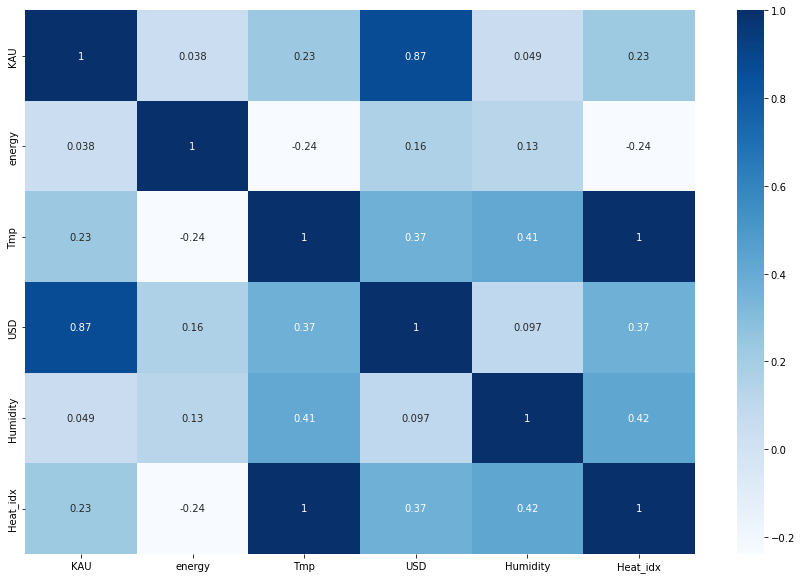

In [159]:
plt.figure(figsize = (15, 10))
sns.heatmap(Winter_df.corr(), annot = True, cmap = 'Blues')

<AxesSubplot:>

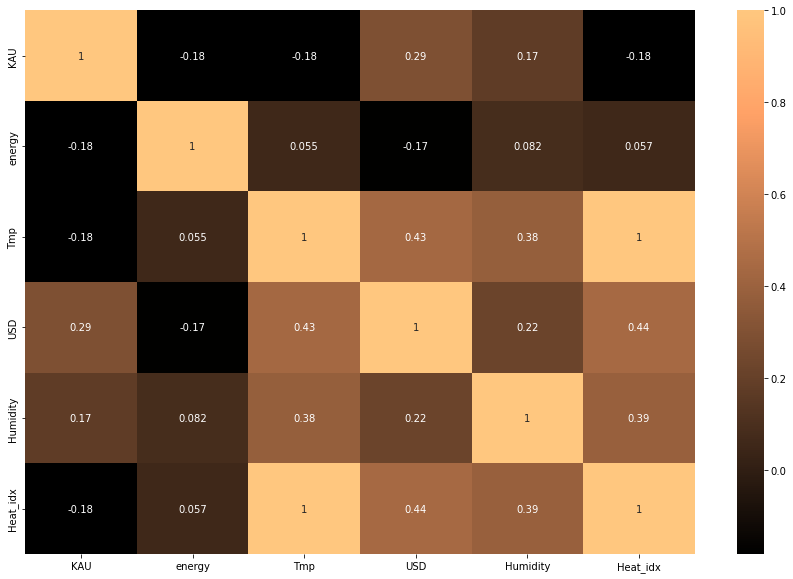

In [160]:
plt.figure(figsize = (15, 10))
sns.heatmap(Fall_df.corr(), annot = True, cmap = 'copper')

<AxesSubplot:>

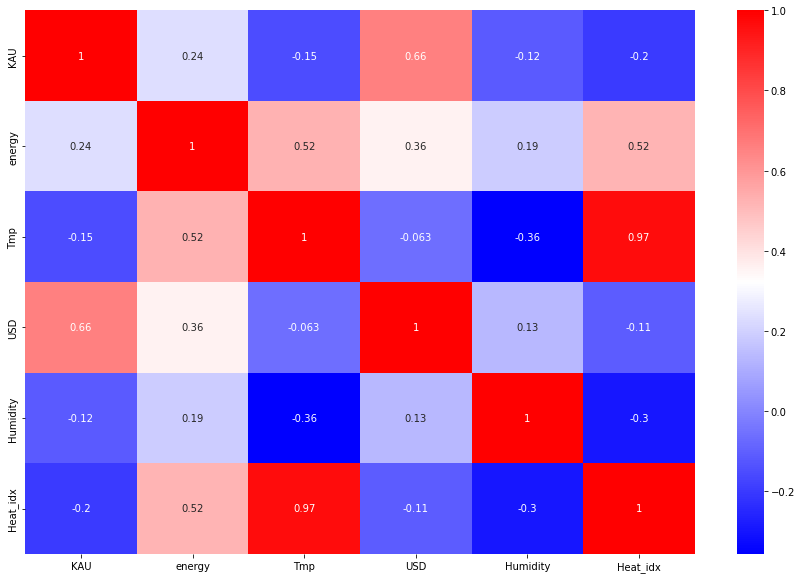

In [161]:
plt.figure(figsize = (15, 10))
sns.heatmap(Summer_df.corr(), annot = True, cmap = 'bwr')

<AxesSubplot:>

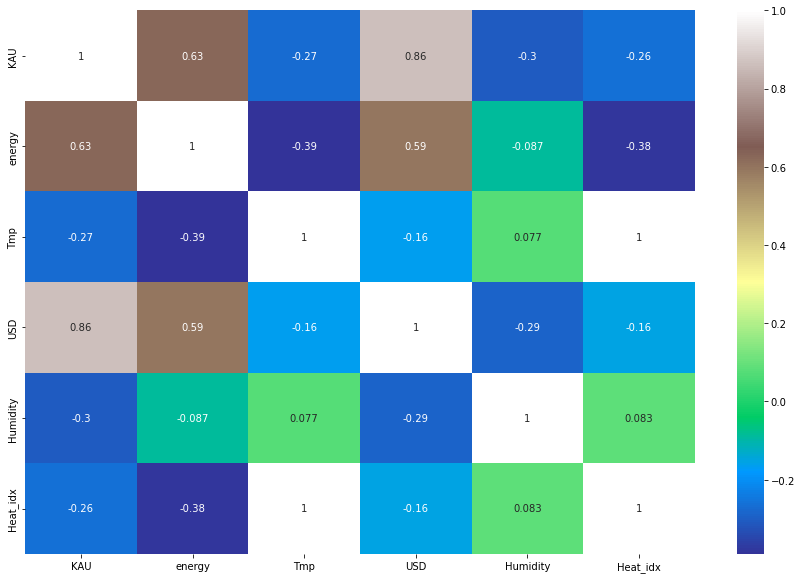

In [162]:
plt.figure(figsize = (15, 10))
sns.heatmap(Spring_df.corr(), annot = True, cmap = 'terrain')

In [163]:
Winter_df.corr()

,KAU,energy,Tmp,USD,Humidity,Heat_idx
KAU,1.000000,0.037974,0.231570,0.867138,0.048990,0.230393
energy,0.037974,1.000000,-0.238474,0.163906,0.129168,-0.235030
Tmp,0.231570,-0.238474,1.000000,0.369475,0.414606,0.997088
USD,0.867138,0.163906,0.369475,1.000000,0.096816,0.366765
Humidity,0.048990,0.129168,0.414606,0.096816,1.000000,0.424670
Heat_idx,0.230393,-0.235030,0.997088,0.366765,0.424670,1.000000


In [164]:
Fall_df.corr()

,KAU,energy,Tmp,USD,Humidity,Heat_idx
KAU,1.000000,-0.181888,-0.183036,0.291613,0.174002,-0.182272
energy,-0.181888,1.000000,0.054787,-0.174482,0.082386,0.056960
Tmp,-0.183036,0.054787,1.000000,0.434365,0.378778,0.999375
USD,0.291613,-0.174482,0.434365,1.000000,0.222964,0.436504
Humidity,0.174002,0.082386,0.378778,0.222964,1.000000,0.385426
Heat_idx,-0.182272,0.056960,0.999375,0.436504,0.385426,1.000000


In [165]:
Summer_df.corr()

,KAU,energy,Tmp,USD,Humidity,Heat_idx
KAU,1.000000,0.236810,-0.152790,0.656702,-0.115163,-0.198207
energy,0.236810,1.000000,0.523488,0.356410,0.188927,0.523019
Tmp,-0.152790,0.523488,1.000000,-0.063101,-0.355819,0.965791
USD,0.656702,0.356410,-0.063101,1.000000,0.133644,-0.108375
Humidity,-0.115163,0.188927,-0.355819,0.133644,1.000000,-0.296974
Heat_idx,-0.198207,0.523019,0.965791,-0.108375,-0.296974,1.000000


In [166]:
Spring_df.corr()

,KAU,energy,Tmp,USD,Humidity,Heat_idx
KAU,1.000000,0.626029,-0.271798,0.860660,-0.304667,-0.264108
energy,0.626029,1.000000,-0.389635,0.594828,-0.086952,-0.383085
Tmp,-0.271798,-0.389635,1.000000,-0.162545,0.076584,0.997180
USD,0.860660,0.594828,-0.162545,1.000000,-0.291818,-0.155778
Humidity,-0.304667,-0.086952,0.076584,-0.291818,1.000000,0.083055
Heat_idx,-0.264108,-0.383085,0.997180,-0.155778,0.083055,1.000000


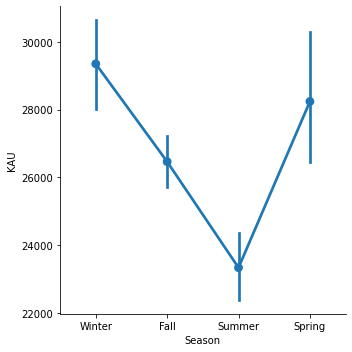

In [167]:
g = sns.catplot(x = 'Season', y = 'KAU',data = data, kind = 'point')

# Outlier(이상치) 데이터 파악하기

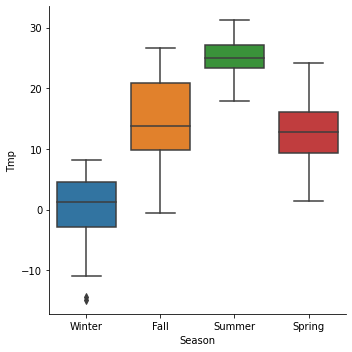

In [168]:
sns.catplot(x = 'Season' ,y = 'Tmp' ,data= data, kind = 'box')

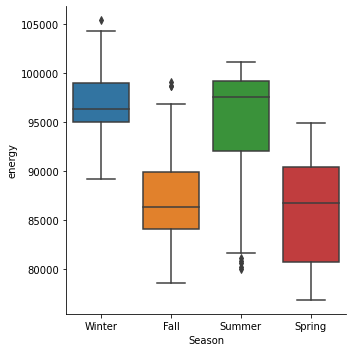

In [169]:
sns.catplot(x = 'Season' ,y = 'energy' ,data= data, kind = 'box')

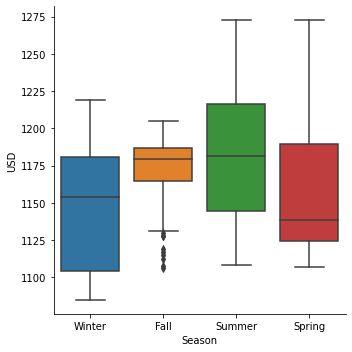

In [170]:
sns.catplot(x = 'Season' ,y = 'USD' ,data= data, kind = 'box')

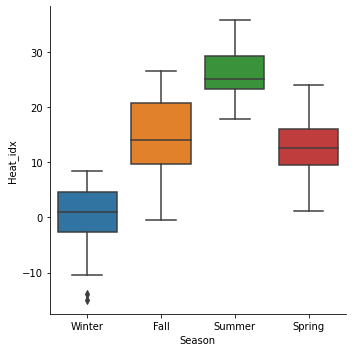

In [171]:
sns.catplot(x = 'Season' ,y = 'Heat_idx' ,data= data, kind = 'box')

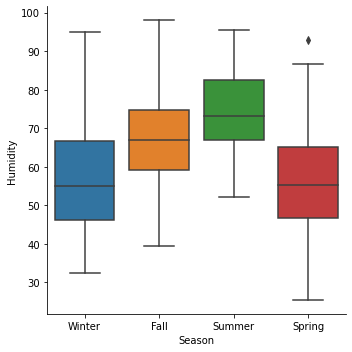

In [172]:
sns.catplot(x = 'Season' ,y = 'Humidity' ,data= data, kind = 'box')

(array([ 30.,  74.,  60.,  52.,  74., 112.,  48.,  35.,   4.,   7.]),
 array([1084.86 , 1103.624, 1122.388, 1141.152, 1159.916, 1178.68 ,
        1197.444, 1216.208, 1234.972, 1253.736, 1272.5  ]),
 <BarContainer object of 10 artists>)

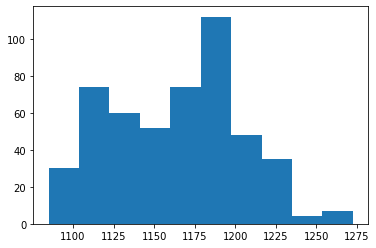

In [173]:
plt.hist(data['USD'])

(array([24., 30., 53., 66., 64., 49., 80., 83., 40.,  7.]),
 array([ 76858. ,  79706.5,  82555. ,  85403.5,  88252. ,  91100.5,
         93949. ,  96797.5,  99646. , 102494.5, 105343. ]),
 <BarContainer object of 10 artists>)

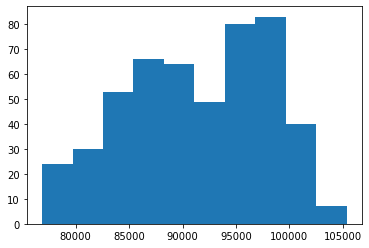

In [174]:
plt.hist(data['energy'])

(array([ 3., 13., 25., 51., 71., 68., 61., 68., 93., 43.]),
 array([-14.9 , -10.29,  -5.68,  -1.07,   3.54,   8.15,  12.76,  17.37,
         21.98,  26.59,  31.2 ]),
 <BarContainer object of 10 artists>)

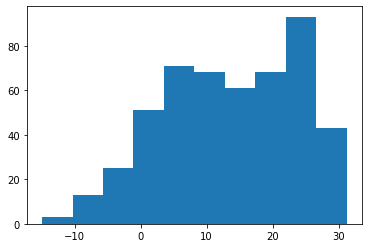

In [175]:
plt.hist(data['Tmp'])

(array([  3.,  17.,  34.,  63.,  76.,  84.,  58., 103.,  35.,  23.]),
 array([-14.95 ,  -9.882,  -4.814,   0.254,   5.322,  10.39 ,  15.458,
         20.526,  25.594,  30.662,  35.73 ]),
 <BarContainer object of 10 artists>)

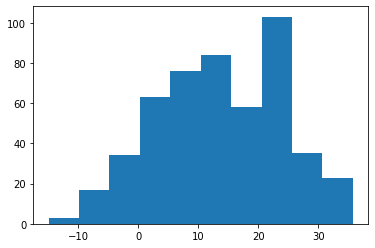

In [176]:
plt.hist(data['Heat_idx'])

(array([ 3., 30., 38., 63., 76., 97., 82., 55., 31., 21.]),
 array([25.5 , 32.75, 40.  , 47.25, 54.5 , 61.75, 69.  , 76.25, 83.5 ,
        90.75, 98.  ]),
 <BarContainer object of 10 artists>)

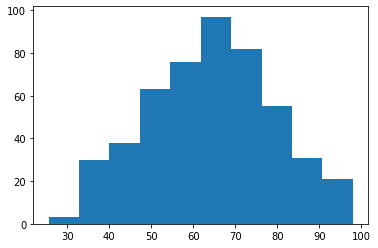

In [177]:
plt.hist(data['Humidity'])

# BoxPlot detect Outlier Data
<strong>- Find Data and Delete Outlier data</strong>

In [178]:
Outliers_to_drop

[156]

In [179]:
def detect_outliers(df, n, features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5*IQR       
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# detect outliers from Age, Sibsp, Parch and Fare

cols = ['KAU', 'energy', 'Tmp', 'USD', 'Humidity', 'Heat_idx']
datasets = [Winter_df, Fall_df, Summer_df, Spring_df]
outs = set()
for dataset in datasets:
    Outliers_to_drop = detect_outliers(dataset, 0 ,cols)
    outs.update(Outliers_to_drop)

outs = list(outs)
data = data.drop(outs, axis = 0).reset_index(drop = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KAU       475 non-null    float64
 1   energy    475 non-null    float64
 2   Tmp       475 non-null    float64
 3   USD       475 non-null    float64
 4   Humidity  475 non-null    float64
 5   Heat_idx  475 non-null    float64
 6   Season    475 non-null    object 
dtypes: float64(6), object(1)
memory usage: 26.1+ KB


In [180]:
Winter_df = data.loc[data['Season'] == 'Winter']
Fall_df = data.loc[data['Season'] == 'Fall']
Summer_df = data.loc[data['Season'] == 'Summer']
Spring_df = data.loc[data['Season'] == 'Spring']

<AxesSubplot:>

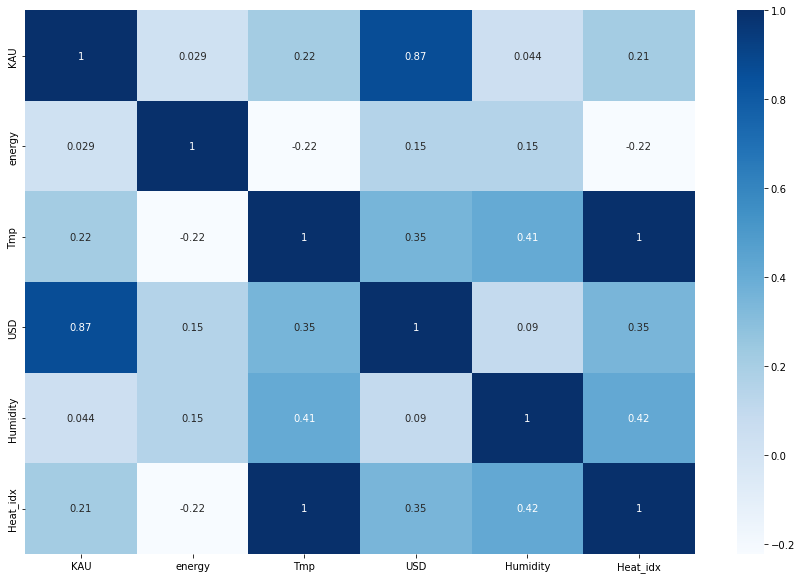

In [181]:
plt.figure(figsize = (15, 10))
sns.heatmap(Winter_df.corr(), annot = True, cmap = 'Blues')

<AxesSubplot:>

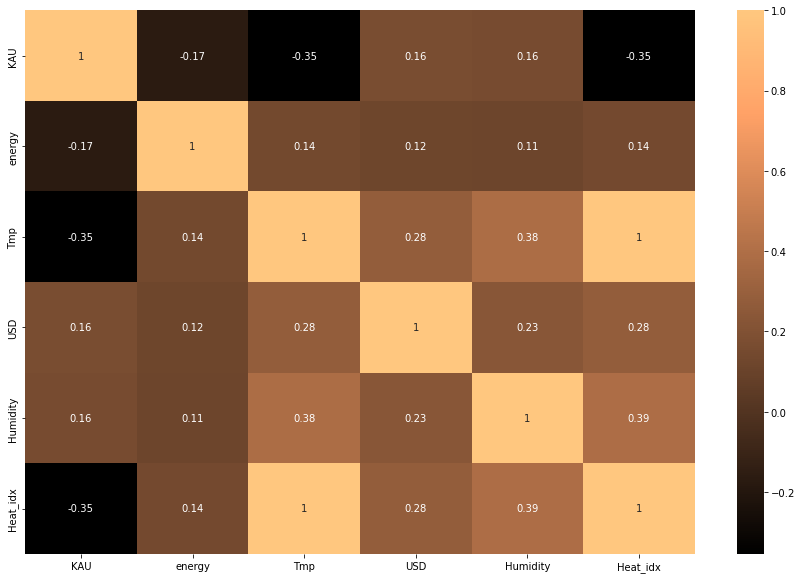

In [182]:
plt.figure(figsize = (15, 10))
sns.heatmap(Fall_df.corr(), annot = True, cmap = 'copper')

<AxesSubplot:>

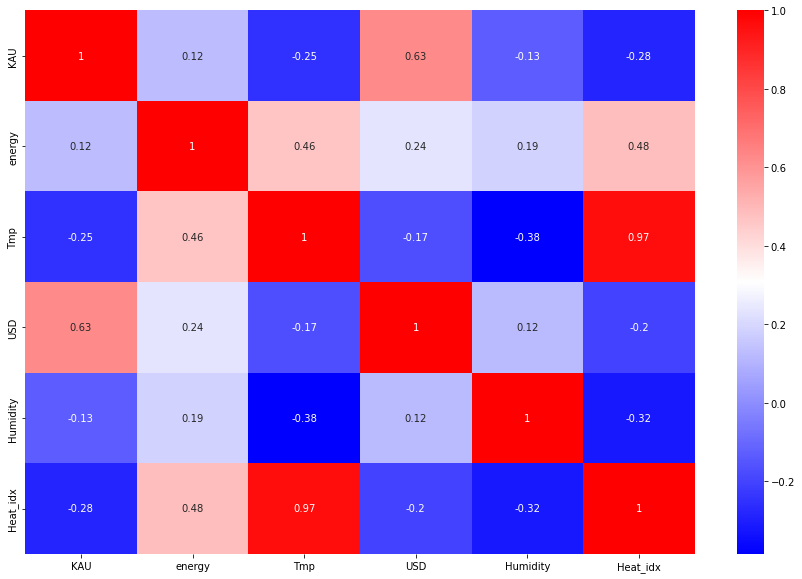

In [183]:
plt.figure(figsize = (15, 10))
sns.heatmap(Summer_df.corr(), annot = True, cmap = 'bwr')

<AxesSubplot:>

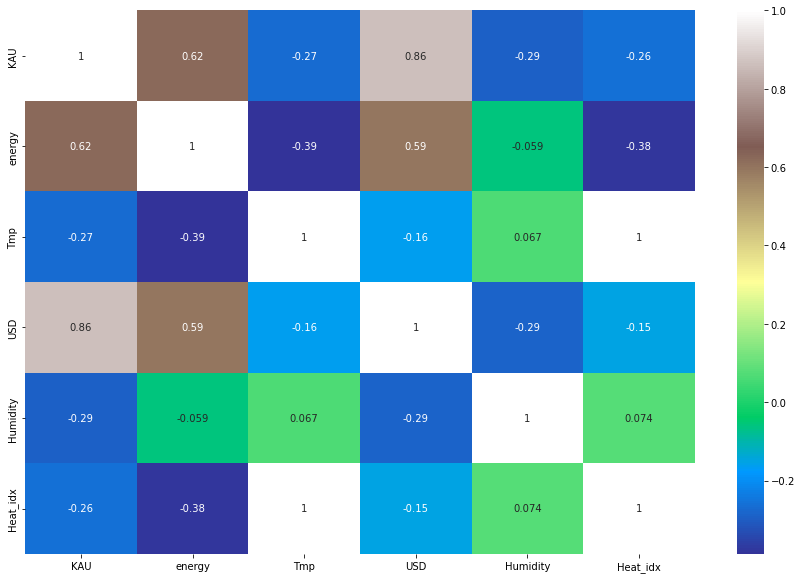

In [184]:
plt.figure(figsize = (15, 10))
sns.heatmap(Spring_df.corr(), annot = True, cmap = 'terrain')

In [191]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y_hat, predictions):
    mae = mean_absolute_error(y_hat, predictions)
    mse = mean_squared_error(y_hat, predictions)
    rmse = np.sqrt(mean_squared_error(y_hat, predictions))
    r_squared = r2_score(y_hat, predictions)
    return mae, mse, rmse, r_squared

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# fro

poly_reg = PolynomialFeatures(degree = 2)

data = pd.get_dummies(data)
# target = data['KAU']
# data.drop('KAU', axis = 1, inplace = True)

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2, random_state = 256)

X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.fit_transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, Y_train)

prediction = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(Y_test, prediction)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

MAE: 5003.711152722961
MSE: 37891258.060893714
RMSE: 6155.5875479838405
R2 Score: 0.4013186240045099
------------------------------
RMSE Cross-Validation: 4900.502082150784


In [149]:
data

,KAU,energy,Tmp,USD,Humidity,Heat_idx,Season
0,35050.0,103867.0,0.4,1184.70,73.5,0.41,Winter
1,35000.0,101789.0,-4.1,1188.09,74.2,-4.35,Winter
2,34900.0,103554.0,-7.6,1185.61,57.9,-8.03,Winter
3,35000.0,101856.0,-0.3,1185.99,66.7,0.53,Winter
4,35100.0,102837.0,2.7,1185.55,54.3,2.57,Winter
...,...,...,...,...,...,...,...
470,35050.0,95463.0,2.4,1168.30,88.3,3.14,Winter
471,35050.0,94123.0,6.3,1167.54,95.0,6.06,Winter
472,35050.0,93842.0,3.1,1165.89,61.7,2.73,Winter
473,39000.0,96134.0,-0.1,1164.95,57.8,0.12,Winter
